In [24]:

%matplotlib  widget

from astropy.io import fits
import matplotlib.pyplot as plt
from  matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import scipy as sc

In [25]:
file_name='vela_2.0-8.0_flux.fits'
vla=fits.open(file_name)


In [26]:
vla.info()

Filename: vela_2.0-8.0_flux.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     189   (588, 472)   float64   


In [27]:
# Get the data and header
data = vla[0].data
header = vla[0].header

# Print the header for metadata
print(header)

# Close the FITS file
vla.close()

SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -64 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                  588 / length of data axis                            NAXIS2  =                  472 / length of data axis                            EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H HDUNAME = 'vela_2.0-8.0_flux.fits' / ASCDM block name                           ASOLFILE= 'pcadf399999303N003_asol1.fits'                                       THRFILE = 'acisD2005-07-01evtspltN0002.fits'                                    ORIGIN  = 'ASC     '           / Source of FITS file                            CREATOR = 'dmimgcalc - Version CIAO 4.4'

visualisation

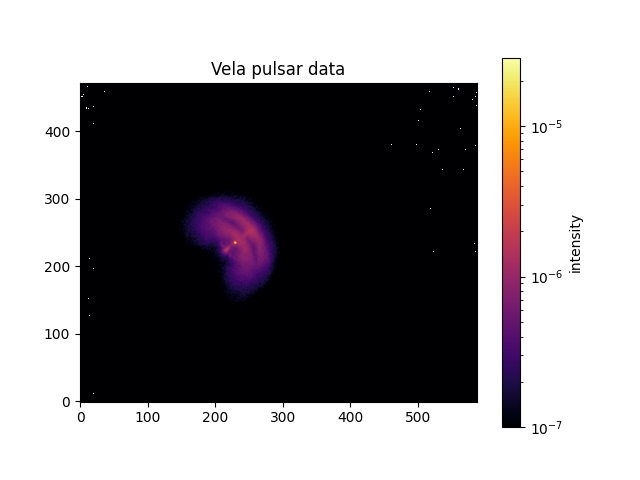

In [28]:
plt.imshow(data,cmap='inferno',origin='lower',norm=LogNorm(vmin=1e-7,vmax=np.max(data)))
plt.colorbar(label='intensity')
plt.title('Vela pulsar data')
plt.show()

In [29]:
#flux calculation


from photutils.aperture import CircularAperture,aperture_photometry
center=(235,230)
radius=10

aperture=CircularAperture(center,radius)

photo_table=aperture_photometry(data,aperture)

print(f"Total flux in circular region is {photo_table['aperture_sum'][0]}")


Total flux in circular region is 0.0003955324412900851


marking regions of interest

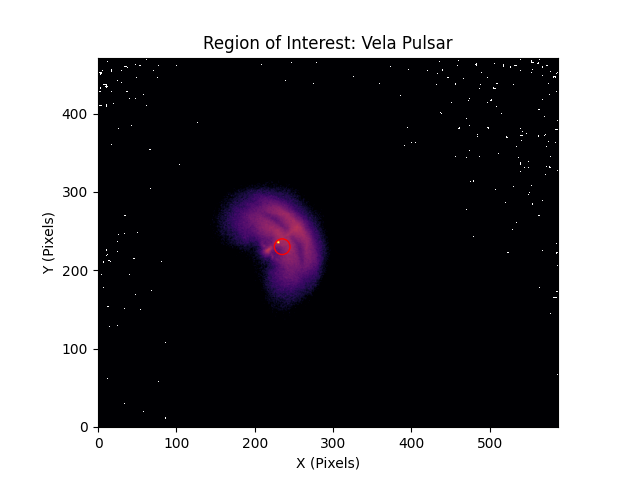

In [30]:
from matplotlib.patches import Circle
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.imshow(data, cmap='inferno', origin='lower',norm=LogNorm(vmin=1e-7,vmax=np.max(data)))

# Draw a circle for the aperture
circle = Circle(center, radius, color='red', fill=False)
ax.add_patch(circle)

plt.title("Region of Interest: Vela Pulsar")
plt.xlabel("X (Pixels)")
plt.ylabel("Y (Pixels)")
plt.show()


In [31]:
# statistics of the data
print("Min value:", np.min(data))
print("Max value:", np.max(data))
print("Mean value:", np.mean(data))



Min value: 0.0
Max value: 2.8446251789390853e-05
Mean value: 3.255571548176964e-08


In [32]:
# coordinates of the brightest pixel
core_position = np.unravel_index(np.argmax(data, axis=None), data.shape)
print(f"Brightest pixel at: {core_position}")


Brightest pixel at: (235, 230)
